# <center>Decision Tree Classifier</center>

Decision tree builds classification or regression models in the form of a tree structure. It breaks down a data set into smaller and smaller subsets while at the same time an associated decision tree is incrementally developed. The final result is a tree with decision nodes and leaf nodes. A decision node has two or more branches and a leaf node represents a classification or decision. The topmost decision node in a tree which corresponds to the best predictor called root node. Decision trees can handle both categorical and numerical data.

# Decision Tree:

**Introduction to Decision Trees :**

<p>A decision tree is a decision support tool that uses a tree-like graph or model of decisions and their possible consequences, including chance event outcomes, resource costs, and utility. It is one way to display an algorithm that only contains conditional control statements.</p>

<p>A decision tree is a flowchart-like structure in which each internal node represents a “test” on an attribute (e.g. whether a coin flip comes up heads or tails), each branch represents the outcome of the test, and each leaf node represents a class label (decision taken after computing all attributes). The paths from root to leaf represent classification rules.</p>

Tree based learning algorithms are considered to be one of the best and mostly used supervised learning methods. Tree based methods empower predictive models with high accuracy, stability and ease of interpretation. Unlike linear models, they map non-linear relationships quite well. They are adaptable at solving any kind of problem at hand (classification or regression). Decision Tree algorithms are referred to as **CART (Classification and Regression Trees)**

- Features:x1,x2,...xn
- Target:y
- Node:features
- leaf:Target

### Common terms used with Decision trees:
- **Root Node:** It represents entire population or sample and this further gets divided into two or more homogeneous sets.
- **Splitting:** It is a process of dividing a node into two or more sub-nodes.
- **Decision Node:** When a sub-node splits into further sub-nodes, then it is called decision node.
- **Leaf/ Terminal Node:** Nodes do not split is called Leaf or Terminal node.
- **Pruning:** When we remove sub-nodes of a decision node, this process is called pruning. You can say opposite process of splitting.
- **Branch / Sub-Tree:** A sub section of entire tree is called branch or sub-tree.
- **Parent and Child Node:** A node, which is divided into sub-nodes is called parent node of sub-nodes whereas sub-nodes are the child of parent node.

![](_pic/img-DecisionTree_RandomForestClassifier/tree-para.png)
![](_pic/img-DecisionTree_RandomForestClassifier/desi.jpg)
![](_pic/img-DecisionTree_RandomForestClassifier/pruning.jpg)
![](_pic/img-DecisionTree_RandomForestClassifier/pruning2.jpg)

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
raw=pd.read_csv('_dataset/Dataset-DecisionTree_RandomForestClassifier/weather_tree.csv')
print(raw.shape)

FileNotFoundError: [Errno 2] No such file or directory: '_dataset/Dataset-DecisionTree_RandomForestClassifier/weather_tree.csv'

In [10]:
X=raw.iloc[:,:-1]   #2d
Y=raw.iloc[:,-1]

**Clean Dataset**

In [11]:
X_new=pd.get_dummies(X)
X_new.head()

,Windy,Outlook_Overcast,Outlook_Rainy,Outlook_Sunny,Temp_Cool,Temp_Hot,Temp_Mild,Humidity_High,Humidity_Normal
0,False,0,1,0,0,1,0,1,0
1,True,0,1,0,0,1,0,1,0
2,False,0,1,0,0,0,1,1,0
3,False,0,1,0,1,0,0,0,1
4,True,0,1,0,0,0,1,0,1


In [12]:
X_new=X_new.values  
Y=Y.values

![](_pic/img-DecisionTree_RandomForestClassifier/tree_p.PNG)

In [27]:
import sklearn
from sklearn.tree import DecisionTreeClassifier
#sklearn.__version__    #'0.21.2'

In [28]:
Model=DecisionTreeClassifier(criterion='entropy')
Model.fit(X_new,Y)

DecisionTreeClassifier(criterion='entropy')

In [29]:
from sklearn.metrics import accuracy_score

In [30]:
pred=Model.predict(X_new)
# pred

In [31]:
accuracy_score(Y,pred)

1.0

In [22]:
from sklearn import tree

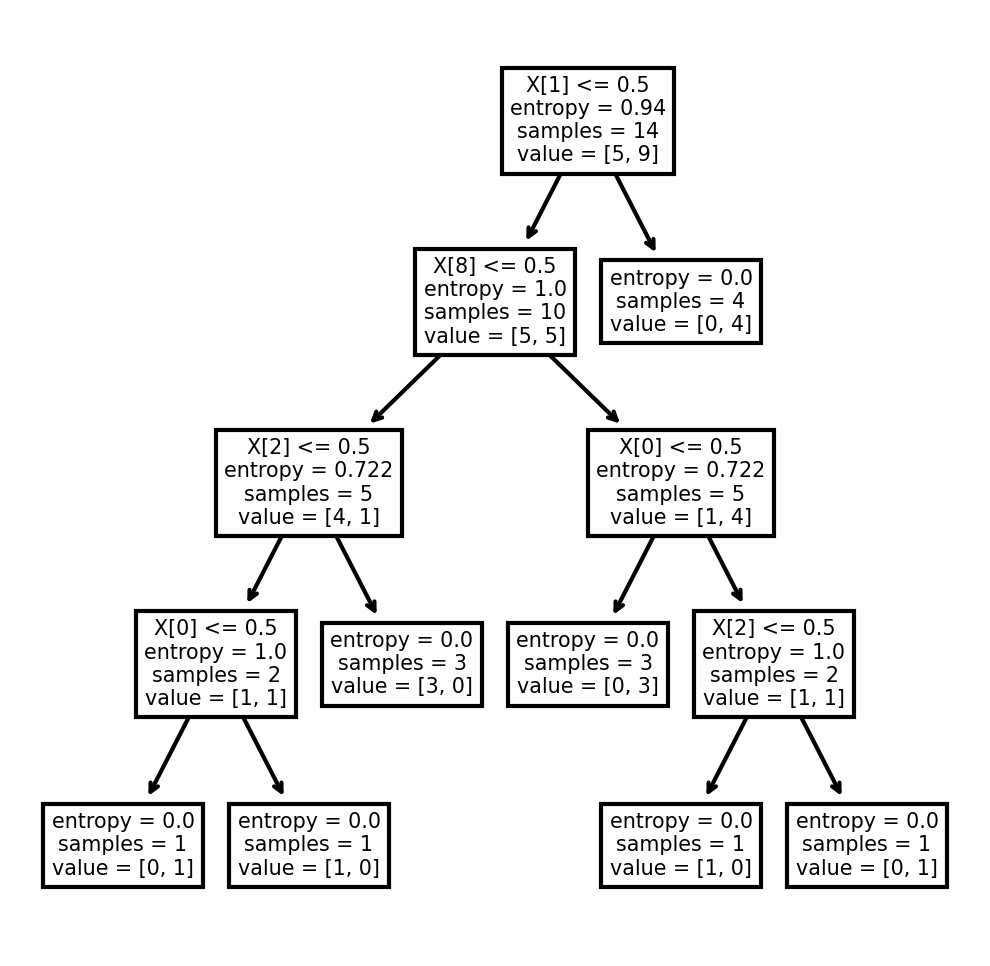

In [21]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(Model);

## 2. Exp

In [24]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [34]:
iris = load_iris()
X = iris.data
y = iris.target

In [35]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, random_state=0)

In [36]:
clf = DecisionTreeClassifier(max_depth = 2,  random_state = 0)
clf.fit(X_train, Y_train)
pred=clf.predict(X_test)
accuracy_score(Y_test,pred)

0.8947368421052632

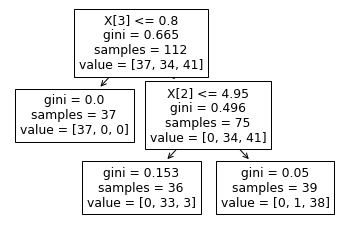

In [37]:
tree.plot_tree(clf);

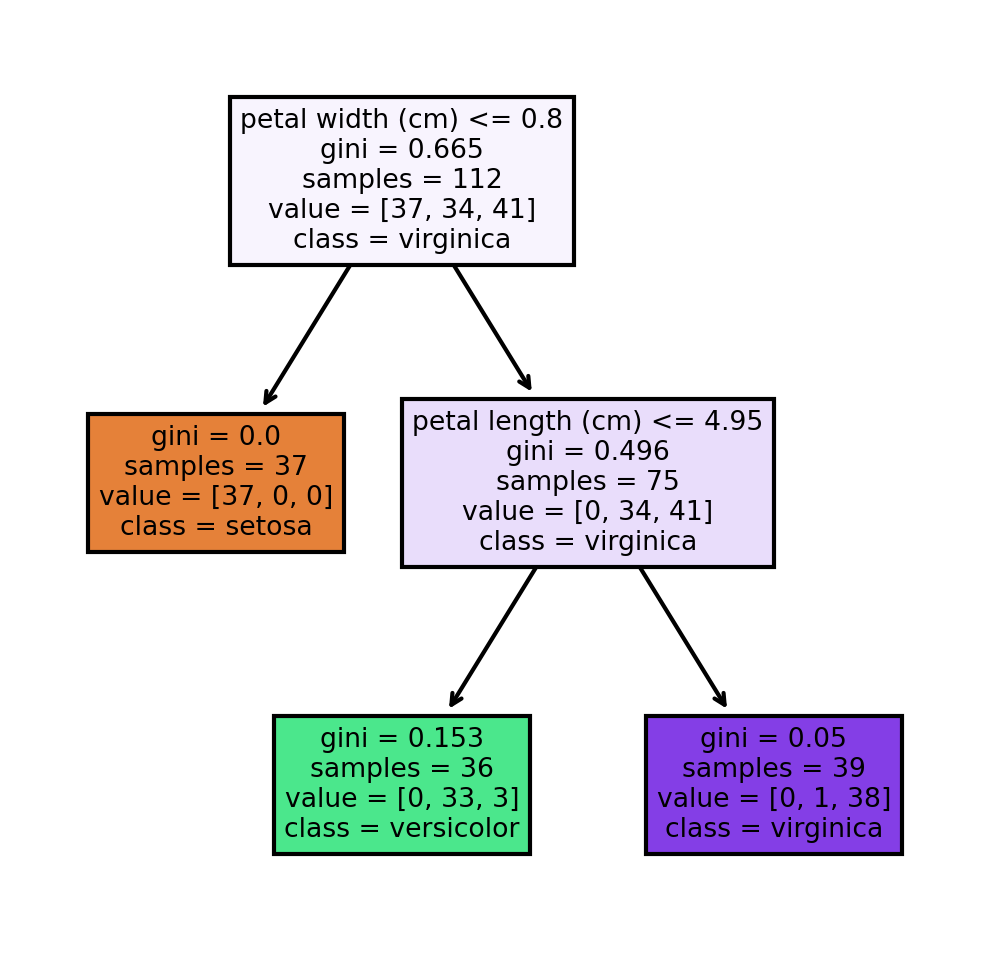

In [40]:
fn=['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']
cn=['setosa', 'versicolor', 'virginica']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(clf, feature_names = fn,  class_names=cn, filled = True);
#fig.savefig('imagename.png')

[Text(558.0, 906.0, 'petal width (cm) <= 0.8\ngini = 0.665\nsamples = 112\nvalue = [37, 34, 41]\nclass = virginica'),
 Text(279.0, 543.6, 'gini = 0.0\nsamples = 37\nvalue = [37, 0, 0]\nclass = setosa'),
 Text(837.0, 543.6, 'petal length (cm) <= 4.95\ngini = 0.496\nsamples = 75\nvalue = [0, 34, 41]\nclass = virginica'),
 Text(558.0, 181.19999999999993, 'gini = 0.153\nsamples = 36\nvalue = [0, 33, 3]\nclass = versicolor'),
 Text(1116.0, 181.19999999999993, 'gini = 0.05\nsamples = 39\nvalue = [0, 1, 38]\nclass = virginica')]

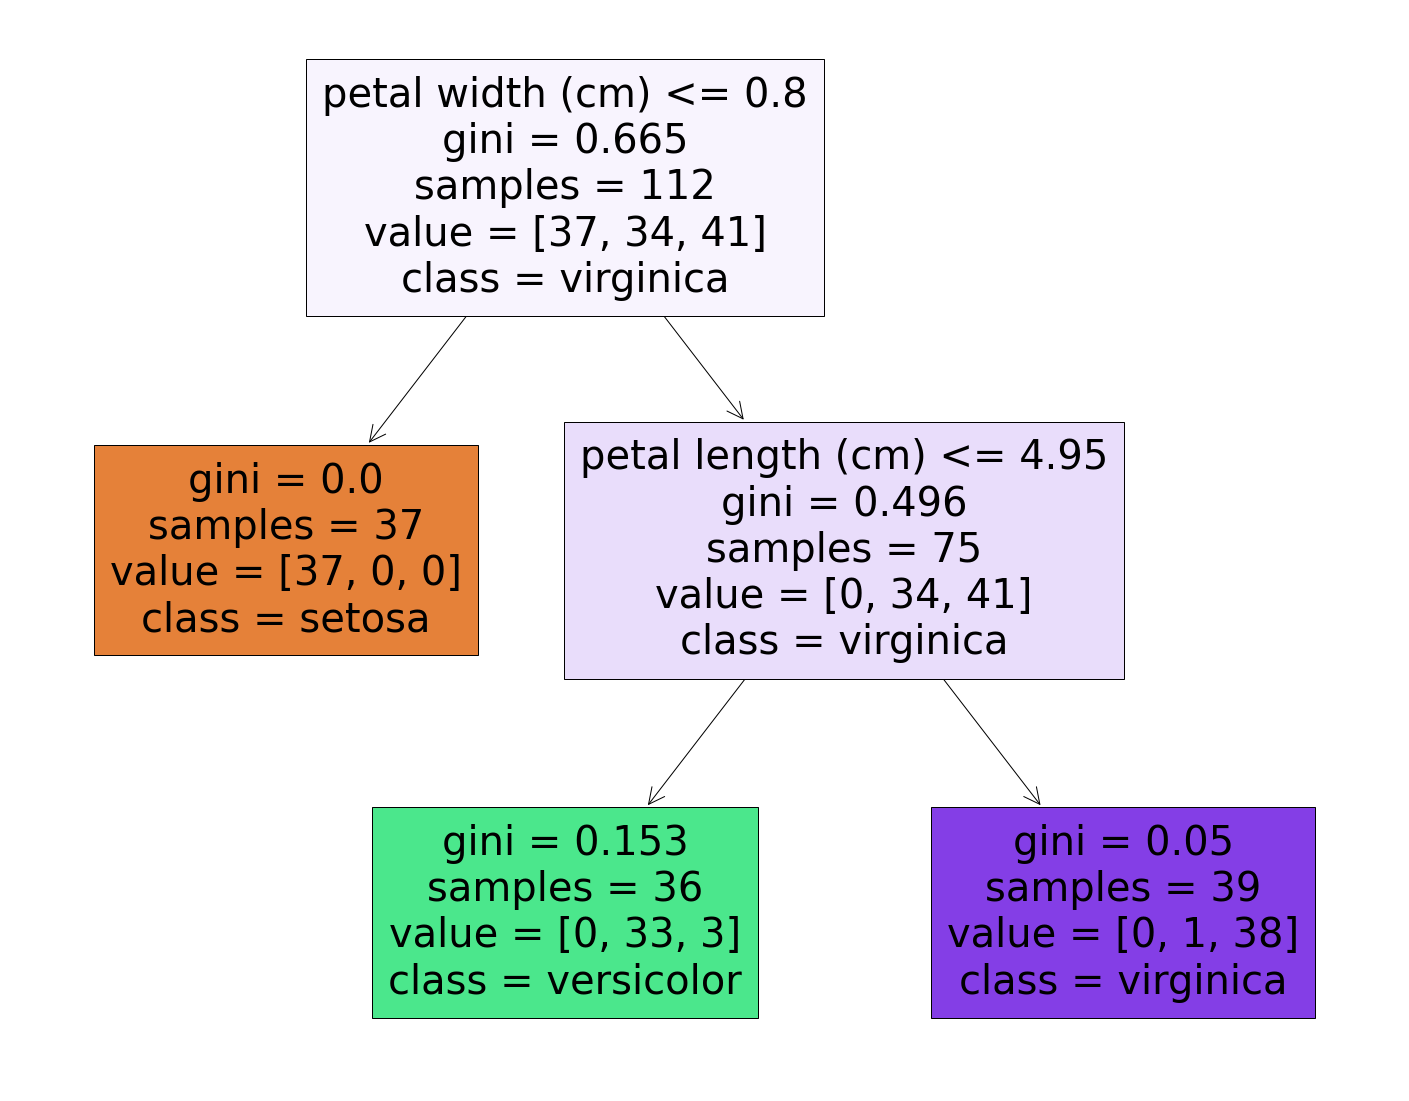

In [46]:
fig = plt.figure(figsize=(25,20))
tree.plot_tree(clf, feature_names=iris.feature_names, class_names=iris.target_names, filled=True)
#fig.savefig("temp/decistion_tree.png")

In [43]:
a=tree.export_text(clf)
print(a)

|--- feature_3 <= 0.80
|   |--- class: 0
|--- feature_3 >  0.80
|   |--- feature_2 <= 4.95
|   |   |--- class: 1
|   |--- feature_2 >  4.95
|   |   |--- class: 2



In [45]:
with open("temp/decistion_tree.log", "w") as fout:
    fout.write(a)

In [ ]:
#pip install graphviz
#https://graphviz.org/download/
# import graphviz
# # DOT data
# dot_data = tree.export_graphviz(clf, out_file=None, 
#                                 feature_names=iris.feature_names,  
#                                 class_names=iris.target_names,
#                                 filled=True)

# # Draw graph
# graph = graphviz.Source(dot_data, format="png") 
# graph

In [ ]:
# from dtreeviz.trees import dtreeviz # remember to load the package

# viz = dtreeviz(clf, X, y,
#                 target_name="target",
#                 feature_names=iris.feature_names,
#                 class_names=list(iris.target_names))

# viz

### 1. ID3 (Iterative Dichotomiser 3):
 - Entropy & Information Gain functions
## Manual : 
**Steps in ID3:**

- a. Calculate Entropy of dataset (Target)
- b. Calculate Entropy of each Feature
- c. Calculate information gain of each feature
- d. Highest gain Fetaure becomes Root Node.
- e. Repeat same steps to buid complete Tree.
 
![](_pic/img-DecisionTree_RandomForestClassifier/tree.png)
![](_pic/img-DecisionTree_RandomForestClassifier/ent.PNG)

## Entrop
Entropy is a measure of disorder or uncertainty and the goal of machine learning models and Data Scientists in general is to reduce uncertainty.
 
#### A. Calculate Entropy of dataset (Target)

**Find out classes in dataset.**
- Prob of Class yes:
<p style='text-align:center'> $P_{yes} = 9/14 =  0.642  $</p>
   
- Prob of Class no:
<p style='text-align:center'> $P_{no} = 5/14 = 0.358   $</p>



**Entrop(Playgolf)=Entrop(yes:9,no:5)** 
<p style='text-align:center'> $(P_{yes}*log_2*P_{yes}) + (P_{no}*log_{2}P_{no}) = (0.642*(-0.63935479754)) + (0.358*(-1.4819685074))=0.409152 + 0.530544 = 0.94   $</p>



#### B. Calculate Entropy of each Feature


**B.1 Outlook:** Find out unique values:(rainy,overcast,sunny)

- Entropy of Rainy: 
 <p style='text-align:center'> $E_{Rainy}=3/5*log_{2}(3/5)+2/5*log_{2}(2/5)=0.971$</p>
 
- Entropy of Overcast:   
 <p style='text-align:center'> $E_{Overcast}=4/4*log_{2}(4/4)=0$</p>
 
- Entropy of Sunny:     
 <p style='text-align:center'> $E_{Sunny}=3/5*log_{2}(3/5)+2/5*log_{2}(2/5)=0.971$</p>

- average entropy of outlook:     
 <p style='text-align:center'> $(E_{Rainy}*P_{Rainy})+(E_{Overcast}*P_{Overcast})+(E_{Sunny}*P_{Sunny}) = (0.971*5/14)+(0)+(0.971*5/14)=0.69$</p>

**B.2 Temperature:** Find out unique values:(Hot,Cool,Mild)

- entropy of hot:-
 <p style='text-align:center'> $E_{hot}=2/4*log_{2}(2/4)+2/4*log_{2}(2/4)=1$</p>

- entropy of cool:-
 <p style='text-align:center'> $E_{cool}=3/4*log2(3/4)+1/4*log_{2}(1/4)=0.811$</p>

- entropy of mild:-
  <p style='text-align:center'> $E_{mild}=4/6*log_{2}(4/6)+2/6*log_{2}(2/6)=0.918$</p>

- average entropy of temperature: 
 <p style='text-align:center'> $(E_{hot}*P_{hot})+(E_{cool}*P_{cool})+(E_{mild}*P_{mild})=>(1*4/14)+(0.811*4/14)+(0.918*6/14)=0.92$</p>

**B.3 Humidity:** Find out unique values:(High, Normal)

- Entropy of High:     -
 <p style='text-align:center'> $E_{high}=3/7*log_{2}(3/7)+4/7*log_{2}(4/7)   =0.985$</p>

- Entropy of Normal:   -
 <p style='text-align:center'> $E_{normal}=6/7*log_{2}(6/7)+1/7*log_{2}(1/7)    =0.591$</p>

- average entropy of :   
 <p style='text-align:center'> $(E_{high}*P_{high})+(E_{normal}*P_{normal})=(0.98*7/14)+(0.591*7/14)  =0.79$</p>
    
**B.3 Windy:** Find out unique values:(True, False)

- entropy of true:-
<p style='text-align:center'> $E_{true}=3/6*log_{2}(3/6)+3/6*log_{2}(3/6)=1$</p>

- entropy of false:-
    <p style='text-align:center'> $E_{false}=6/8*log_{2}(6/8)+2/8*log_{2}(2/8)=0.811$</p>

-average entropy of : 
<p style='text-align:center'> $(E_{true}*P_{true})+(E_{false}*P_{false})=(1*6/14)+(0.811*8/14)=0.892$</p>

####  C. Calculate information gain of each feature

![](img/img-DecisionTree_RandomForestClassifier/Gain.PNG)

Information Gain of Outlook:- 
<p style='text-align:center'> $E(playgolf)-E(Outlook)=0.94-0.69=0.25$</p>

Information Gain of Temperature:
<p style='text-align:center'> $E(playgolf)-E(temperature)=0.94-0.92=0.02$</p>

Information Gain of Humidity:
<p style='text-align:center'> $E(playgolf)-E(Humidity)=0.94-0.79=0.15$</p>

Information Gain of Windy:
<p style='text-align:center'> $E(playgolf)-E(Windy)=0.94-0.892=0.048$</p>

Now outlook is root node:
- overcast is always yes
 rainy,sunny need further splitting.
 
**Rainy:**

|Outlook| Humidity |Windy   |Temp  |Play|
|:---|:---|:---|:---|:---|
|Rainy  | High     |FALSE  | Hot        |No|
|Rainy   |High     |TRUE    |Hot        |No|
|Rainy   |High     |FALSE   |Mild      |No|
|Rainy   |Normal   |FALSE   |Cool    | Yes|
| Rainy   |Normal   |TRUE    |Mild      |Yes|

repeat untill we get leaf....

 

### 2. CART(Classification And Regression Tree):
      - Gini function

 # <p style='text-align:center'> $Gini = 1-∑_{j}^{i=n}P_{j}^{2}$</p>

**WHERE:**

        - P: PROBABILITY
        - j:(Yes,No)
        
![](tree.png)

#### A: Calculate gini index of dataset
<p style='text-align:center'> $Total_{Yes} = 9$</p>
<p style='text-align:center'> $Total_{No} = 5$</p>
<p style='text-align:center'> $Total      = 14$</p>

<p style='text-align:center'> $P_{yes}=9/14=0.64  $</p>
<p style='text-align:center'> $P_{no}=5/14=0.35   $</p>

gini index of dataset:
        <p style='text-align:center'> $1-(P_{no}^2+P_{yes}^2) =1-(0.413+0.127)=0.46   $</p>


#### B: Calculate gini index of each feature

**B.1:**calculate gini index of outlook:

 <p style='text-align:center'> $Gini(outlook,rainy)=     1-[(2/5)^2+(3/5)^2]=0.48$</p>
 <p style='text-align:center'> $Gini(outlook,overcast)=  1-[(4/4)^2] = 0.0$</p>
 <p style='text-align:center'> $Gini(outlook,sunny)=     1-[(3/5)^2+(2/5)^2] =0.48$</p>

 <p style='text-align:center'> $Gini index of Outlook=G(o,rainy)*P_{rainy}+G(o,overcast)*P_{overcast}+G(o,sunny)*P_{sunny}
	=0.48*(5/14)+0+.48*(5/14)
	=.3428$</p>

**B.2:calculate gini index of temp:**

 <p style='text-align:center'> $Gini(temp,hot)=1-[(2/4)^2+(2/4)^2]=1-[.25+.25]=1-.50=.50$</p>
 <p style='text-align:center'> $Gini(temp,mild)=1-[(4/6)^2+(2/6)^2]=1-[.43+.10]=.47$</p>
 <p style='text-align:center'> $Gini(temp,cold)=1-[(3/4)^2+(1/4)^2]=1-[.56+.06]=1-.62=.38$</p>

<p style='text-align:center'> $Gini index of Temp=G(temp,hot)*P_{hot}+G(temp,mild)*P_{mild}+G(temp,cold)*P_{cold}
	=.50*(4/14)+.47*(6/14)+.38*(4/14)
	=.14+.20+.10
	=.44$</p>
    
**B.3:calculate gini index of Humidity:**

 <p style='text-align:center'> $Gini(h,high)=1-[(3/7)^2+(4/7)^2]
	    =1-[.17+.32]=1-.49=.51$</p>
 <p style='text-align:center'> $Gini(h,normal)=1-[(6/7)^2+(1/7)^2]
	      =1-[.72+.01]=1-.73=.27$</p>

 <p style='text-align:center'> $Gini index of Humidity=G(h,high)*P_{high}+G(h,normal)*P_{normal}
	=.51*(7/14)+.27*(7/14)
	=.25+.13
	=.38$</p>

**B.4:calculate gini index of Windy:**

 <p style='text-align:center'> $Gini(windy,true)=1-[(3/6)^2+(3/6)^2]=1-[.5+.5]=1-1=0$</p>
 <p style='text-align:center'> $Gini(windy,false)=1-[(6/8)^2+(2/8)^2]=1-[.56+.06]=.62$</p>
	
 <p style='text-align:center'> $Gini index of Windy=G(windy,true)*P_{true}+G(windy,false)*P_{false}
		=0+.62*(8/14)
		=.35$</p>

#### C: Calcilate gini gain of each feature

 <p style='text-align:center'> $Gini gain of Outlook=Gini(total)-Gini(Outllok)=.46-.34=.12$</p>
 <p style='text-align:center'> $Gini gain of Temp=Gini(total)-Gini(temp)=.46-.44=.02$</p>
 <p style='text-align:center'> $Gini gain of Humidity=Gini(total)-Gini(h)=.46-.38=.08$</p>
 <p style='text-align:center'> $Gini gain of Windy=Gini(total)-Gini(windy)=.46-.35=.11$</p>
 <p style='text-align:center'> $Gini gain of Humidity= .08$</p>

#### D:  Pick the highest gain feature as root

So Max Gini gain attribute is Outlook,make it root node
Repeat this process for building tree.

	



#### E: Repeat this for further subsets to complete tree

## Decision Tree Program